In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
df=pd.read_csv('/content/taxi_trip_pricing.csv')
df
df = df[['Trip_Distance_km', 'Trip_Price']]
df







,Trip_Distance_km,Trip_Price
0,19.35,36.2624
1,47.59,NaN
2,36.87,52.9032
3,30.33,36.4698
4,NaN,15.6180
...,...,...
995,5.49,34.4049
996,45.95,62.1295
997,7.70,33.1236
998,47.56,61.2090


Finding Null Values in the Dataset

In [2]:
df.isna().sum()

,0
Trip_Distance_km,50
Trip_Price,49


Now filling Null values in the Dataset

In [3]:
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(),inplace=True)
df['Trip_Price'].fillna(df['Trip_Price'].median(),inplace=True)

Check After filling Null values

In [4]:
df.isna().sum()

,0
Trip_Distance_km,0
Trip_Price,0


In [5]:
df.describe()

,Trip_Distance_km,Trip_Price
count,1000.000000,1000.000000
mean,27.008520,56.541560
std,19.402661,39.492129
min,1.230000,6.126900
25%,13.107500,34.578850
50%,25.830000,50.074500
75%,37.782500,67.476650
max,146.067047,332.043689


Finding outlier in the dataset by using Box whisker plot

<Axes: ylabel='Trip_Distance_km'>

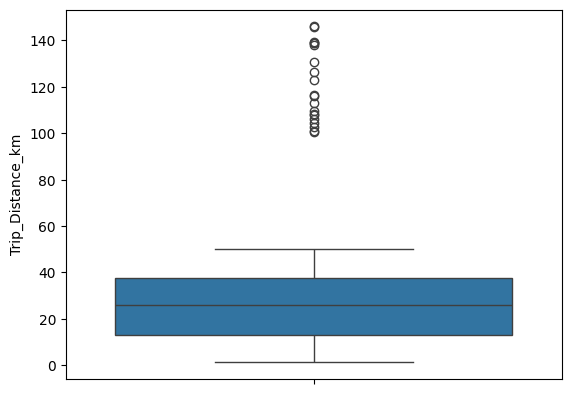

In [6]:
sns.boxplot(y=df['Trip_Distance_km'])

<Axes: ylabel='Trip_Price'>

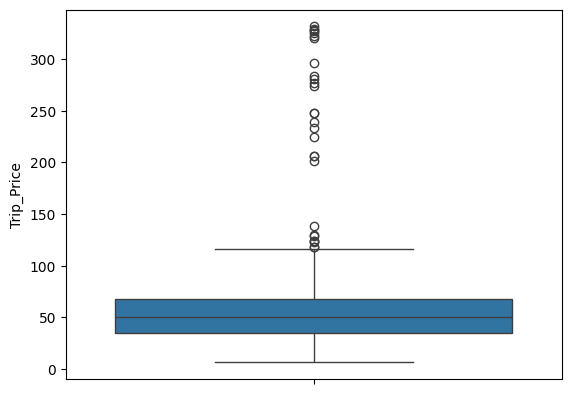

In [7]:
sns.boxplot(y=df['Trip_Price'])

In [8]:
Q1 = df['Trip_Price'].quantile(0.25)
Q3 = df['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Trip_Price'] >= lower_bound) & (df['Trip_Price'] <= upper_bound)]

<Axes: ylabel='Trip_Price'>

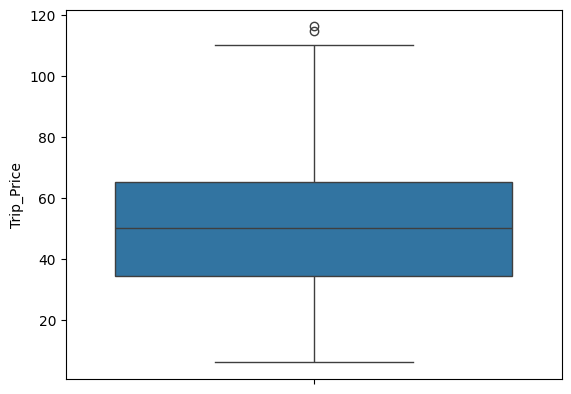

In [9]:
sns.boxplot(y=df['Trip_Price'])

Using Describe Function

<Axes: ylabel='Trip_Price'>

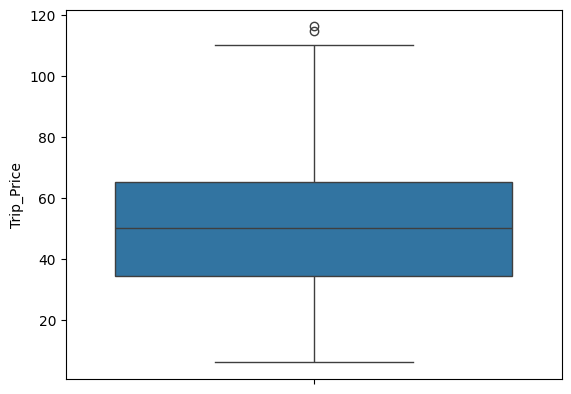

In [10]:
sns.boxplot(y=df['Trip_Price'])

In [11]:
X = df[['Trip_Distance_km']]
y = df['Trip_Price']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Now using model Linear Regression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

Now Using Mean Square Error

In [16]:
MSE=mean_squared_error(y_test,y_pred)
MSE

267.6224308042325

Now using RMSE

In [17]:
np.sqrt(MSE)

16.359169624532676

In [18]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.06448502]
Intercept: 24.933649066433993


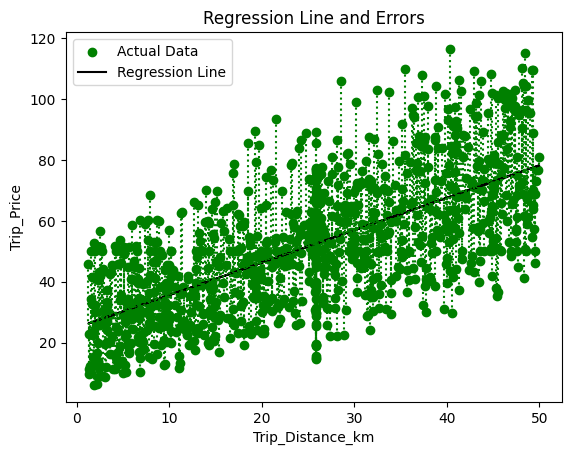

In [19]:
plt.scatter(X, y, color='Green', label='Actual Data')
plt.plot(X, model.predict(X), color='black', label='Regression Line')
for i in range(len(X)):
    plt.plot([X.iloc[i, 0], X.iloc[i, 0]], [y.iloc[i], model.predict(X)[i]], color='green', linestyle='dotted')
plt.xlabel('Trip_Distance_km')
plt.ylabel('Trip_Price')
plt.title('Regression Line and Errors')
plt.legend()
plt.show()